IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import pipeline
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import sklearn as skl
%matplotlib inline

In [2]:
df = pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
df.drop(labels=['salary', 'salary_currency'], axis=1, inplace=True)

In [4]:
job_title_frequency = df["job_title"].value_counts()

In [5]:
less_common_titles = job_title_frequency[job_title_frequency < 50]

In [6]:
for title in df["job_title"]:
    if title in less_common_titles:
        df.drop(df[df["job_title"] == title].index, inplace=True)

In [7]:
company_location_frequency = df["company_location"].value_counts()

In [8]:
less_common_locations = company_location_frequency[company_location_frequency < 50]

In [9]:
for location in df["company_location"]:
    if location in less_common_locations:
        df.drop(df[df["company_location"] == location].index, inplace=True)

In [10]:
employee_residence_frequency = df["employee_residence"].value_counts()

In [11]:
less_favoured_countries = employee_residence_frequency[employee_residence_frequency < 50]

In [12]:
for location in df["employee_residence"]:
    if location in less_favoured_countries:
        df.drop(df[df["employee_residence"] == location].index, inplace=True)

In [13]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,CA,0,CA,M


In [14]:
df["employment_type"].value_counts()

FT    2930
PT       3
CT       1
FL       1
Name: employment_type, dtype: int64

In [15]:
df["job_title"].value_counts()

Data Engineer                985
Data Scientist               747
Data Analyst                 577
Machine Learning Engineer    248
Data Architect               101
Analytics Engineer            99
Research Scientist            69
Applied Scientist             58
Data Science Manager          51
Name: job_title, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935 entries, 3 to 3752
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2935 non-null   int64 
 1   experience_level    2935 non-null   object
 2   employment_type     2935 non-null   object
 3   job_title           2935 non-null   object
 4   salary_in_usd       2935 non-null   int64 
 5   employee_residence  2935 non-null   object
 6   remote_ratio        2935 non-null   int64 
 7   company_location    2935 non-null   object
 8   company_size        2935 non-null   object
dtypes: int64(3), object(6)
memory usage: 229.3+ KB


In [17]:
oe = preprocessing.OrdinalEncoder()


In [18]:
df["experience_level"] = oe.fit_transform(df[["experience_level"]])
df["remote_ratio"] = oe.fit_transform(df[["remote_ratio"]])
df["job_title"] = oe.fit_transform(df[["job_title"]])

In [19]:
size_oe = preprocessing.OrdinalEncoder(categories=[['S', 'M', 'L']])

In [20]:
df["company_size"] = size_oe.fit_transform(df[["company_size"]])

In [21]:
type_oe = preprocessing.OrdinalEncoder(categories=[['FL', 'PT', 'CT', 'FT']])

In [22]:
df["employment_type"] = type_oe.fit_transform(df[["employment_type"]])

In [23]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2023,3.0,3.0,6.0,175000,CA,2.0,CA,1.0
4,2023,3.0,3.0,6.0,120000,CA,2.0,CA,1.0
5,2023,3.0,3.0,1.0,222200,US,0.0,US,2.0
6,2023,3.0,3.0,1.0,136000,US,0.0,US,2.0
7,2023,3.0,3.0,6.0,219000,CA,0.0,CA,1.0


In [24]:
ohe = preprocessing.OneHotEncoder()
matrix = ohe.fit_transform(df[["company_location", "work_year", "employee_residence"]]).toarray()

In [25]:
print(matrix)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [26]:
matrix.shape

(2935, 12)

In [27]:
features_labels = ohe.categories_
features_labels = np.concatenate([row for row in features_labels])
features_labels

array(['CA', 'ES', 'GB', 'US', 2020, 2021, 2022, 2023, 'CA', 'ES', 'GB',
       'US'], dtype=object)

In [28]:
features_labels = ['CCA', 'CES','CGB', 'CUS', 2020, 2021, 2022, 2023, 'RCA','RES', 'RGB', 'RUS']

In [29]:
encoded_df = pd.DataFrame(matrix, columns=features_labels)
encoded_df

,CCA,CES,CGB,CUS,2020,2021,2022,2023,RCA,RES,RGB,RUS
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2930,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2931,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2932,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2933,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2023,3.0,3.0,6.0,175000,CA,2.0,CA,1.0
4,2023,3.0,3.0,6.0,120000,CA,2.0,CA,1.0
5,2023,3.0,3.0,1.0,222200,US,0.0,US,2.0
6,2023,3.0,3.0,1.0,136000,US,0.0,US,2.0
7,2023,3.0,3.0,6.0,219000,CA,0.0,CA,1.0
...,...,...,...,...,...,...,...,...,...
3741,2020,2.0,3.0,6.0,118000,US,2.0,US,1.0
3742,2020,2.0,3.0,6.0,138350,US,2.0,US,1.0
3743,2020,2.0,3.0,4.0,130800,ES,2.0,US,1.0
3750,2020,3.0,3.0,6.0,412000,US,2.0,US,2.0


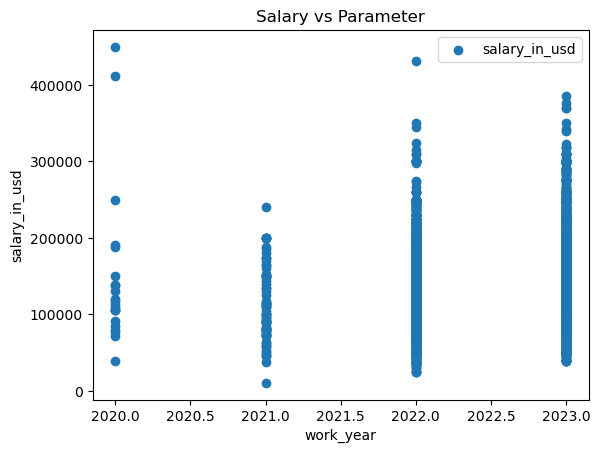

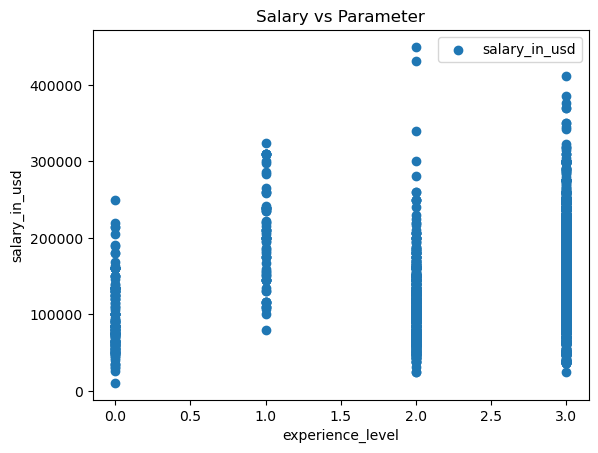

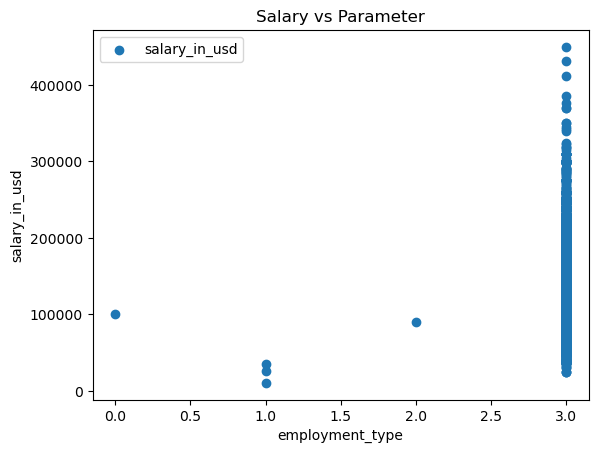

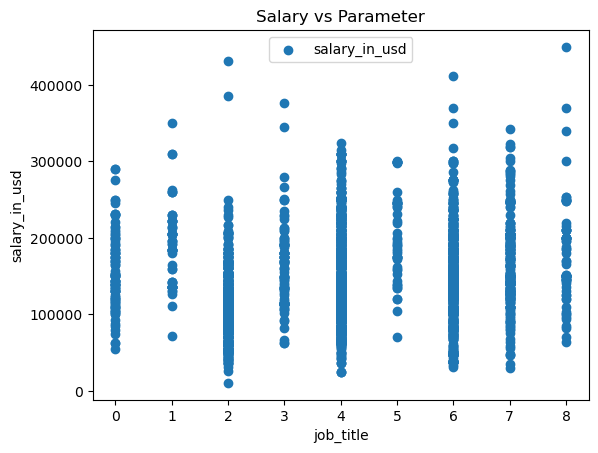

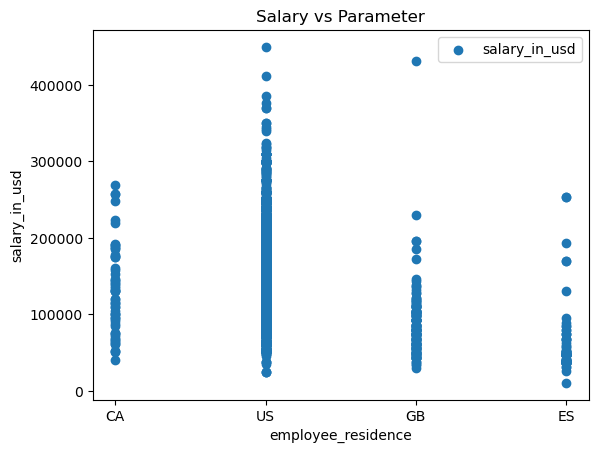

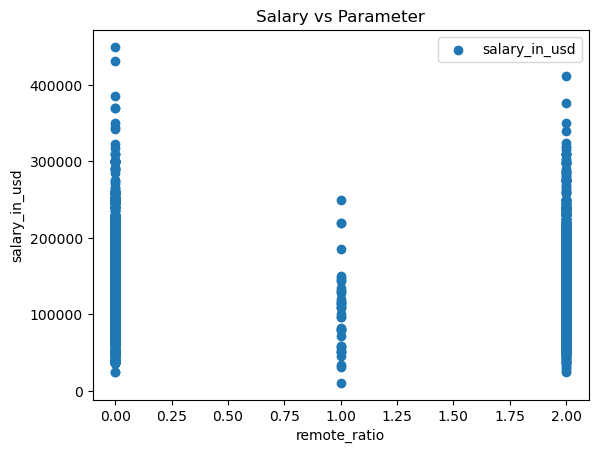

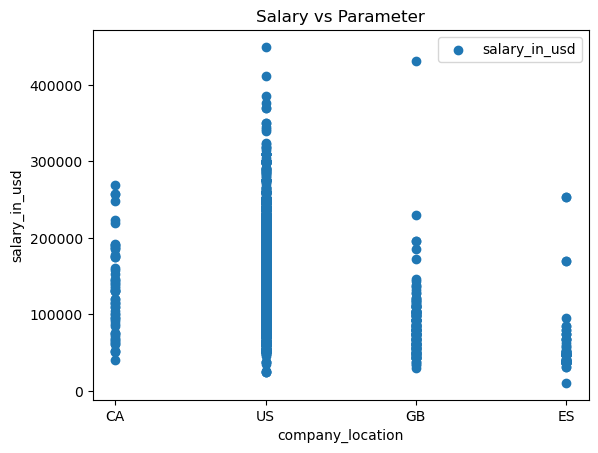

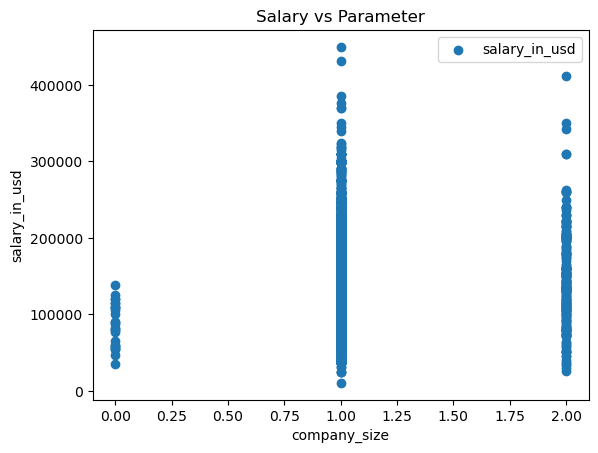

In [31]:
for col in df.columns:
    if col != "salary_in_usd":
        plt.figure()
        plt.title("Salary vs Parameter")
        plt.scatter(x = col, y = "salary_in_usd", data=df)
        plt.xlabel(col)
        plt.ylabel("salary_in_usd")
        plt.legend();

In [32]:
df = pd.concat([df, encoded_df.set_axis(df.index)], axis=1)

In [33]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,CCA,CES,CGB,CUS,2020,2021,2022,2023,RCA,RES,RGB,RUS
3,2023,3.0,3.0,6.0,175000,CA,2.0,CA,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,2023,3.0,3.0,6.0,120000,CA,2.0,CA,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,2023,3.0,3.0,1.0,222200,US,0.0,US,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,2023,3.0,3.0,1.0,136000,US,0.0,US,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,2023,3.0,3.0,6.0,219000,CA,0.0,CA,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3741,2020,2.0,3.0,6.0,118000,US,2.0,US,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3742,2020,2.0,3.0,6.0,138350,US,2.0,US,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3743,2020,2.0,3.0,4.0,130800,ES,2.0,US,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3750,2020,3.0,3.0,6.0,412000,US,2.0,US,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
df.drop(labels=["employment_type", "experience_level", "work_year", "company_location", "employee_residence"], axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935 entries, 3 to 3752
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job_title      2935 non-null   float64
 1   salary_in_usd  2935 non-null   int64  
 2   remote_ratio   2935 non-null   float64
 3   company_size   2935 non-null   float64
 4   CCA            2935 non-null   float64
 5   CES            2935 non-null   float64
 6   CGB            2935 non-null   float64
 7   CUS            2935 non-null   float64
 8   2020           2935 non-null   float64
 9   2021           2935 non-null   float64
 10  2022           2935 non-null   float64
 11  2023           2935 non-null   float64
 12  RCA            2935 non-null   float64
 13  RES            2935 non-null   float64
 14  RGB            2935 non-null   float64
 15  RUS            2935 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 389.8 KB


In [36]:
df.head()

,job_title,salary_in_usd,remote_ratio,company_size,CCA,CES,CGB,CUS,2020,2021,2022,2023,RCA,RES,RGB,RUS
3,6.0,175000,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,6.0,120000,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,1.0,222200,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,1.0,136000,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,6.0,219000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [37]:
df.describe()

,job_title,salary_in_usd,remote_ratio,company_size,CCA,CES,CGB,CUS,2020,2021,2022,2023,RCA,RES,RGB,RUS
count,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000
mean,4.252129,146577.813629,0.873595,1.065758,0.020443,0.023509,0.048722,0.907325,0.007496,0.025894,0.455877,0.510733,0.020784,0.024872,0.048382,0.905963
std,1.909991,56855.324511,0.985599,0.282595,0.141534,0.151540,0.215324,0.290025,0.086268,0.158847,0.498134,0.499970,0.142684,0.155762,0.214608,0.291931
min,0.000000,10354.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000,106800.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,141300.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,6.000000,180000.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,8.000000,450000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df.columns

Index([    'job_title', 'salary_in_usd',  'remote_ratio',  'company_size',
                 'CCA',           'CES',           'CGB',           'CUS',
                  2020,            2021,            2022,            2023,
                 'RCA',           'RES',           'RGB',           'RUS'],
      dtype='object')

In [39]:
df

,job_title,salary_in_usd,remote_ratio,company_size,CCA,CES,CGB,CUS,2020,2021,2022,2023,RCA,RES,RGB,RUS
3,6.0,175000,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,6.0,120000,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,1.0,222200,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,1.0,136000,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,6.0,219000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3741,6.0,118000,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3742,6.0,138350,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3743,4.0,130800,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3750,6.0,412000,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
for col in df.columns:
    if col != "salary_in_usd":
        try: 
            print(col, end=" : ")
            print(df[col].corr(df["salary_in_usd"]))
        except ValueError:
            continue

job_title : 0.1865789331407543
remote_ratio : 0.0027141139595032895
company_size : 0.03142329515728401
CCA : -0.04096520024279792
CES : -0.2393535990018029
CGB : -0.2364357325593546
CUS : 0.32059235868179575
2020 : 0.0029934205291056847
2021 : -0.09639489973688833
2022 : -0.09085033434573885
2023 : 0.1206262334234406
RCA : -0.04259202258251905
RES : -0.2386021214821738
RGB : -0.23559518876339303
RUS : 0.3213193627230138


In [41]:

x = df.drop(labels=["salary_in_usd"], axis=1)
y = df['salary_in_usd']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=45)
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

Linear Regression

In [42]:
lr_model = linear_model.LinearRegression()
reg = lr_model.fit(x_train, y_train)

In [43]:
train_preds = reg.predict(x_train)
test_preds = reg.predict(x_test)

In [44]:
print("The training score of linear regression is :", reg.score(x_train, y_train))
print("The test score of linear regression is : ", reg.score(x_test, y_test))

The training score of linear regression is : 0.18232888485669363
The test score of linear regression is :  0.14501174125919747


In [45]:
print("Mean Absolute Error ", metrics.mean_absolute_error(y_train, train_preds))
print("Mean Squared Error ", metrics.mean_squared_error(y_train, train_preds))
print("Root Mean Squared Error ", np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

Mean Absolute Error  39908.21933560477
Mean Squared Error  2635686455.8854346
Root Mean Squared Error  51338.93703501695


In [46]:
print("Mean Absolute Error ", metrics.mean_absolute_error(y_test, test_preds))
print("Mean Squared Error ", metrics.mean_squared_error(y_test, test_preds))
print("Root Mean Squared Error ", np.sqrt(metrics.mean_squared_error(y_test, test_preds)))

Mean Absolute Error  39810.60647359455
Mean Squared Error  2788297669.5979557
Root Mean Squared Error  52804.33381454552


Ridge Regression

In [47]:
alpha_vals = [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 6]
train_scores = []
test_scores = []
for val in alpha_vals:
    clf = (linear_model.Ridge(alpha=val))
    train_score = model_selection.cross_val_score(clf, x_train, y_train, cv=5)
    train_scores.append(train_score.mean())
    test_score = model_selection.cross_val_score(clf, x_test, y_test, cv=5)
    test_scores.append(test_score.mean())

print(train_scores)
print(test_scores)
print(train_scores.index(max(train_scores)))
print(test_scores.index(max(test_scores)))

[0.17466038324396918, 0.1753054582528985, 0.1755832928703271, 0.17573006148610143, 0.17582581004418205, 0.17589452939310252, 0.17594626982669828, 0.17601692965767882, 0.17605821098998706, 0.17607880906406484]
[0.11869765096764466, 0.11995944547127117, 0.12111409384452858, 0.12197552549600477, 0.12264074224196989, 0.1231649231027093, 0.12358247375631567, 0.12418239849109525, 0.12455534584164596, 0.12476533388675093]
9
9


In [48]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(linear_model.Ridge(max_iter=5000), {
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'alpha' : [1, 1.5, 2, 2.5, 3]
    }, cv=5)
clf.fit(x_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.00286894, 0.00171847, 0.00260043, 0.00220032, 0.02596354,
        0.03953037, 0.00186114, 0.00175643, 0.00220065, 0.00240064,
        0.0172431 , 0.03379078, 0.00160012, 0.00161371, 0.00214777,
        0.00228276, 0.01257854, 0.02812338, 0.00205688, 0.00170527,
        0.00241818, 0.00187173, 0.01326628, 0.02457252, 0.00150404,
        0.00189033, 0.00234504, 0.0022851 , 0.01410384, 0.02321401]),
 'std_fit_time': array([0.00131879, 0.00058629, 0.00049008, 0.00040009, 0.00429672,
        0.00394449, 0.00043978, 0.00059643, 0.00040016, 0.00049008,
        0.00223369, 0.00561418, 0.00048947, 0.00054561, 0.00018022,
        0.00055902, 0.00159749, 0.00347894, 0.00011299, 0.00039561,
        0.00054987, 0.00045252, 0.00228443, 0.00322201, 0.00044804,
        0.00046127, 0.00044841, 0.00046048, 0.00102964, 0.00446262]),
 'mean_score_time': array([0.0018703 , 0.00109501, 0.00120034, 0.00100026, 0.00120153,
        0.00150542, 0.00120754, 0.00115223, 0.00100026, 0.00

In [49]:
results_df = pd.DataFrame(clf.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002869,0.001319,0.001870,3.056623e-04,1,svd,"{'alpha': 1, 'solver': 'svd'}",0.144450,0.179472,0.185667,0.200502,0.167826,0.175583,0.018800,28
1,0.001718,0.000586,0.001095,1.073937e-04,1,cholesky,"{'alpha': 1, 'solver': 'cholesky'}",0.144450,0.179472,0.185667,0.200502,0.167826,0.175583,0.018800,29
2,0.002600,0.000490,0.001200,4.001141e-04,1,lsqr,"{'alpha': 1, 'solver': 'lsqr'}",0.144136,0.179390,0.185782,0.200514,0.168057,0.175576,0.018898,30
3,0.002200,0.000400,0.001000,1.168008e-07,1,sparse_cg,"{'alpha': 1, 'solver': 'sparse_cg'}",0.144483,0.179487,0.185662,0.200502,0.167826,0.175592,0.018789,25
4,0.025964,0.004297,0.001202,2.466252e-04,1,sag,"{'alpha': 1, 'solver': 'sag'}",0.144446,0.179474,0.185669,0.200502,0.167829,0.175584,0.018801,27
5,0.039530,0.003944,0.001505,5.080586e-04,1,saga,"{'alpha': 1, 'solver': 'saga'}",0.144442,0.179476,0.185672,0.200501,0.167834,0.175585,0.018803,26
6,0.001861,0.000440,0.001208,1.546926e-04,1.5,svd,"{'alpha': 1.5, 'solver': 'svd'}",0.144394,0.179991,0.185821,0.200415,0.168029,0.175730,0.018818,22
7,0.001756,0.000596,0.001152,7.492282e-04,1.5,cholesky,"{'alpha': 1.5, 'solver': 'cholesky'}",0.144394,0.179991,0.185821,0.200415,0.168029,0.175730,0.018818,23
8,0.002201,0.000400,0.001000,3.234067e-07,1.5,lsqr,"{'alpha': 1.5, 'solver': 'lsqr'}",0.144213,0.179942,0.185874,0.200427,0.168163,0.175724,0.018874,24
9,0.002401,0.000490,0.001000,2.780415e-07,1.5,sparse_cg,"{'alpha': 1.5, 'solver': 'sparse_cg'}",0.144411,0.179995,0.185815,0.200415,0.168029,0.175733,0.018812,19


In [50]:
results_df[["params", "mean_test_score"]]

,params,mean_test_score
0,"{'alpha': 1, 'solver': 'svd'}",0.175583
1,"{'alpha': 1, 'solver': 'cholesky'}",0.175583
2,"{'alpha': 1, 'solver': 'lsqr'}",0.175576
3,"{'alpha': 1, 'solver': 'sparse_cg'}",0.175592
4,"{'alpha': 1, 'solver': 'sag'}",0.175584
5,"{'alpha': 1, 'solver': 'saga'}",0.175585
6,"{'alpha': 1.5, 'solver': 'svd'}",0.175730
7,"{'alpha': 1.5, 'solver': 'cholesky'}",0.175730
8,"{'alpha': 1.5, 'solver': 'lsqr'}",0.175724
9,"{'alpha': 1.5, 'solver': 'sparse_cg'}",0.175733


Lasso Regressinon

In [51]:
alpha_vals = [3, 4, 5, 6, 7, 8, 9, 10]
train_scores = []
test_scores = []
for val in alpha_vals:
    clf = (linear_model.Lasso(alpha=val))
    train_score = model_selection.cross_val_score(clf, x_train, y_train, cv=5)
    train_scores.append(train_score.mean())
    test_score = model_selection.cross_val_score(clf, x_test, y_test, cv=5)
    test_scores.append(test_score.mean())

print(train_scores)
print(test_scores)
print(train_scores.index(max(train_scores)))
print(test_scores.index(max(test_scores)))

c:\Users\shour\.conda\envs\hello\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.378e+08, tolerance: 6.129e+08
  model = cd_fast.enet_coordinate_descent(


[0.17544026657441814, 0.17555766029444697, 0.17566652352534853, 0.1757349412138848, 0.17580657838020508, 0.1758389415243316, 0.1758614338996035, 0.17588405703817145]
[0.11178142866721255, 0.11185873579370975, 0.1119342700228372, 0.11200960246878602, 0.11208417561123726, 0.11215861640374551, 0.11223257989065319, 0.11230621999488258]
7
7


In [52]:
reg = linear_model.LassoCV(cv = 5).fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))

0.18170186093453
0.14991323049965977


In [53]:
reg.alpha_

65.01573703963038

In [54]:
cv_reg = linear_model.LassoLarsCV(max_iter=50).fit(x_train, y_train)
print(cv_reg.score(x_train, y_train))
print(cv_reg.score(x_test, y_test))
print(cv_reg.alpha_)

0.18169113355295352
0.14997085955292966
66.340811742817


Elastic Net Regression

In [55]:
train_scores = []
test_scores = []
for i in range(1, 10):
    j = i / 10
    ENR = linear_model.ElasticNetCV(l1_ratio=j)
    ENR.fit(x_train, y_train)
    train = ENR.score(x_train, y_train)
    train_scores.append(train)
    test = ENR.score(x_test, y_test)
    test_scores.append(test)
print(train_scores)
print(test_scores)

[0.0017664984945249262, 0.0038637129672421944, 0.006395201820271534, 0.009513866258419434, 0.013456806148784195, 0.018617588971012178, 0.025721824233597368, 0.03638857204843804, 0.05623151978063823]
[0.0004797113123864438, 0.0020884392581468347, 0.004022919422713267, 0.006394912417155285, 0.009376129518892662, 0.013248866870918086, 0.01853005882444625, 0.0263813867335827, 0.0410389082028193]


Stochastic Gradient Regression

In [56]:
clf = GridSearchCV(linear_model.SGDRegressor(),
                   {'l1_ratio' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                       'alpha' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
                   }, cv=5)
clf.fit(x_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.0046659 , 0.0048326 , 0.00445228, 0.00411177, 0.00432615,
        0.00402369, 0.00340309, 0.00402503, 0.0037569 , 0.0034287 ,
        0.00285883, 0.00332389, 0.00332799, 0.00370698, 0.00347672,
        0.00333376, 0.00394335, 0.00392294, 0.00389943, 0.00373983,
        0.003023  , 0.00285172, 0.00306616, 0.00345736, 0.00339613,
        0.00350242, 0.00347681, 0.0032577 , 0.0034235 , 0.00312119,
        0.00307035, 0.00372939, 0.00291524, 0.00363393, 0.00353308,
        0.00280142, 0.00346537, 0.00286136, 0.00354147, 0.00287089,
        0.0030889 , 0.00376902, 0.00331712, 0.00370827, 0.00331602,
        0.00321364, 0.00315366, 0.00331917, 0.00345292, 0.00363722,
        0.00332375, 0.00350122, 0.00320034, 0.00378861, 0.00272665,
        0.00404177, 0.00301666, 0.00245171, 0.0030262 , 0.0031599 ,
        0.00285697, 0.00362692, 0.00338578, 0.00331116, 0.00314674,
        0.00322714, 0.00285668, 0.00357265, 0.00390673, 0.00273695,
        0.00285568, 0.00362525,

In [57]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004666,0.000996,0.001370,0.000545,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",0.143014,0.173081,0.136151,0.179273,0.137322,0.153768,0.018547,5
1,0.004833,0.000899,0.001205,0.000401,0.1,0.2,"{'alpha': 0.1, 'l1_ratio': 0.2}",0.143894,0.176701,0.127603,0.179092,0.152166,0.155891,0.019644,3
2,0.004452,0.000515,0.001473,0.000419,0.1,0.3,"{'alpha': 0.1, 'l1_ratio': 0.3}",0.142493,0.170584,0.152529,0.144156,0.146919,0.151336,0.010210,6
3,0.004112,0.001333,0.001541,0.000508,0.1,0.4,"{'alpha': 0.1, 'l1_ratio': 0.4}",0.105975,0.156676,0.147724,0.182240,0.145085,0.147540,0.024582,8
4,0.004326,0.000599,0.001249,0.000496,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",0.142149,0.174744,0.153550,0.177268,0.151930,0.159928,0.013718,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.002587,0.001605,0.001843,0.001039,0.9,0.5,"{'alpha': 0.9, 'l1_ratio': 0.5}",0.089108,0.080514,0.071847,0.104309,0.055614,0.080278,0.016339,80
77,0.003926,0.000871,0.000935,0.000901,0.9,0.6,"{'alpha': 0.9, 'l1_ratio': 0.6}",0.080206,0.096150,0.040263,0.100997,0.090788,0.081681,0.021831,77
78,0.003201,0.000703,0.000858,0.000594,0.9,0.7,"{'alpha': 0.9, 'l1_ratio': 0.7}",0.090212,0.097707,0.052780,0.101174,0.089306,0.086236,0.017316,70
79,0.003349,0.000303,0.000772,0.000388,0.9,0.8,"{'alpha': 0.9, 'l1_ratio': 0.8}",0.095619,0.074299,0.055555,0.101490,0.085126,0.082418,0.016327,75


Polynomial Regression

In [58]:
model_d2 = pipeline.Pipeline([('poly', preprocessing.PolynomialFeatures(degree=2, interaction_only=True)), 
                  ('linear', linear_model.LinearRegression())])

In [59]:
fit_d2 = model_d2.fit(x_train, y_train)
print("Training Score ", fit_d2.score(x_train, y_train))
print("Test Score ", fit_d2.score(x_test, y_test))

Training Score  0.20248314004586743
Test Score  -1.0648740571245657e+23


In [60]:
model_d3 = pipeline.Pipeline([('poly', preprocessing.PolynomialFeatures(degree=3, interaction_only=True)), 
                  ('linear', linear_model.LinearRegression())])

In [61]:
fit_d3 = model_d3.fit(x_train, y_train)
print("Training Score ", fit_d2.score(x_train, y_train))
print("Test Score ", fit_d2.score(x_test, y_test))

Training Score  0.20248314004586743
Test Score  -1.0648740571245657e+23


In [62]:
import tensorflow as tf
from keras import models
from keras import layers

In [ ]:
model = models.Sequential(
    [layers.Dense(8, activation='linear')]
)